# Practical Exam: House sales

RealAgents is a real estate company that focuses on selling houses.

RealAgents sells a variety of types of house in one metropolitan area.

Some houses sell slowly and sometimes require lowering the price in order to find a buyer.

In order to stay competitive, RealAgents would like to optimize the listing prices of the houses it is trying to sell.

They want to do this by predicting the sale price of a house given its characteristics.

If they can predict the sale price in advance, they can decrease the time to sale.


## Data

The dataset contains records of previous houses sold in the area.

| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
| house_id    | Nominal. </br> Unique identifier for houses. </br>Missing values not possible. |
| city        | Nominal. </br>The city in which the house is located. One of 'Silvertown', 'Riverford', 'Teasdale' and 'Poppleton'. </br>Replace missing values with "Unknown". |
| sale_price  | Discrete. </br>The sale price of the house in whole dollars. Values can be any positive number greater than or equal to zero.</br>Remove missing entries. |
| sale_date   | Discrete. </br>The date of the last sale of the house. </br>Replace missing values with 2023-01-01. |
| months_listed  | Continuous. </br>The number of months the house was listed on the market prior to its last sale, rounded to one decimal place. </br>Replace missing values with mean number of months listed, to one decimal place. |
| bedrooms    | Discrete. </br>The number of bedrooms in the house. Any positive values greater than or equal to zero. </br>Replace missing values with the mean number of bedrooms, rounded to the nearest integer. |
| house_type   | Ordinal. </br>One of "Terraced" (two shared walls), "Semi-detached" (one shared wall), or "Detached" (no shared walls). </br>Replace missing values with the most common house type. |
| area      | Continuous. </br>The area of the house in square meters, rounded to one decimal place. </br>Replace missing values with the mean, to one decimal place. |


# Task 1

The team at RealAgents knows that the city that a property is located in makes a difference to the sale price. 

Unfortuntately they believe that this isn't always recorded in the data. 

Calculate the number of missing values of the `city`. 

 - You should use the data in the file "house_sales.csv". 

 - Your output should be an object `missing_city`, that contains the number of missing values in this column. 

In [124]:
import pandas as pd
import numpy as np

# Load the dataset
house_sales = pd.read_csv("house_sales.csv")
# Find unique values in the 'bedrooms' column
unique_city = house_sales['city'].unique()

# Print the unique values
print("Unique values in the 'bedrooms' column:", unique_city)

# Replace "--" with NaN in the 'city' column
house_sales['city'].replace("--", np.nan, inplace=True)

# Calculate the total number of missing values in the 'city' column
missing_city = house_sales['city'].isnull().sum()

# Print the result
print("Number of missing values in the 'city' column (including '--'):", missing_city)
house_sales.info()
house_sales

Unique values in the 'bedrooms' column: ['Silvertown' 'Riverford' 'Teasdale' 'Poppleton' '--']
Number of missing values in the 'city' column (including '--'): 73
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       1500 non-null   int64  
 1   city           1427 non-null   object 
 2   sale_price     1500 non-null   int64  
 3   sale_date      1500 non-null   object 
 4   months_listed  1469 non-null   float64
 5   bedrooms       1500 non-null   int64  
 6   house_type     1500 non-null   object 
 7   area           1500 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


,house_id,city,sale_price,sale_date,months_listed,bedrooms,house_type,area
0,1217792,Silvertown,55943,2021-09-12,5.4,2,Semi-detached,107.8 sq.m.
1,1900913,Silvertown,384677,2021-01-17,6.3,5,Detached,498.8 sq.m.
2,1174927,Riverford,281707,2021-11-10,6.9,6,Detached,542.5 sq.m.
3,1773666,Silvertown,373251,2020-04-13,6.1,6,Det.,528.4 sq.m.
4,1258487,Silvertown,328885,2020-09-24,8.7,5,Detached,477.1 sq.m.
...,...,...,...,...,...,...,...,...
1495,1123892,Riverford,198661,2022-02-17,7.3,5,Detached,432.2 sq.m.
1496,1327295,Poppleton,358304,2020-10-10,6.2,6,Detached,599.8 sq.m.
1497,1058161,Riverford,176612,2022-11-01,6.8,4,Detached,359.1 sq.m.
1498,1822037,Teasdale,197827,2021-04-03,5.4,3,Detached,253.7 sq.m.


# Task 2 

Before you fit any models, you will need to make sure the data is clean. 

The table below shows what the data should look like. 

Create a cleaned version of the dataframe. 

 - You should start with the data in the file "house_sales.csv". 

 - Your output should be a dataframe named `clean_data`. 

 - All column names and values should match the table below.


| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
| house_id    | Nominal. </br> Unique identifier for houses. </br>Missing values not possible. |
| city        | Nominal. </br>The city in which the house is located. One of 'Silvertown', 'Riverford', 'Teasdale' and 'Poppleton' </br>Replace missing values with "Unknown". |
| sale_price  | Discrete. </br>The sale price of the house in whole dollars. Values can be any positive number greater than or equal to zero.</br>Remove missing entries. |
| sale_date   | Discrete. </br>The date of the last sale of the house. </br>Replace missing values with 2023-01-01. |
| months_listed  | Continuous. </br>The number of months the house was listed on the market prior to its last sale, rounded to one decimal place. </br>Replace missing values with mean number of months listed, to one decimal place. |
| bedrooms    | Discrete. </br>The number of bedrooms in the house. Any positive values greater than or equal to zero. </br>Replace missing values with the mean number of bedrooms, rounded to the nearest integer. |
| house_type   | Ordinal. </br>One of "Terraced", "Semi-detached", or "Detached". </br>Replace missing values with the most common house type. |
| area      | Continuous. </br>The area of the house in square meters, rounded to one decimal place. </br>Replace missing values with the mean, to one decimal place. |

In [125]:
# Use this cell to write your code for Task 2


# Load the dataset
house_sales = pd.read_csv("house_sales.csv")
house_sales.info()
house_sales.isnull().sum()

num_duplicates = house_sales.duplicated(subset=['house_id']).sum()
print(num_duplicates)

print((house_sales['city'].unique()))
# Step 1: Replace "--" with NaN in the 'city' column
house_sales['city'].replace("--", np.nan, inplace=True)

house_sales['city'].fillna("Unknown", inplace=True)

# Step 2: Remove missing entries in the 'sale_price' column
house_sales = house_sales.dropna(subset=['sale_price'])
house_sales['sale_price'] = house_sales['sale_price'].apply(lambda x: max(0, x))


# Step 3: Replace missing values in the 'sale_date' column with '2023-01-01'
house_sales['sale_date'].fillna('2023-01-01', inplace=True)

# Step 4: Replace missing values in the 'months_listed' column with the mean number of months listed
mean_months_listed = house_sales['months_listed'].mean()
house_sales['months_listed'].fillna(mean_months_listed, inplace=True)
house_sales['months_listed'] = pd.to_numeric(house_sales['months_listed'], errors='coerce').round(1)
# Step 5: Replace missing values in the 'bedrooms' column with the mean number of bedrooms rounded to the nearest integer
mean_bedrooms = round(house_sales['bedrooms'].mean())
print(mean_bedrooms)
house_sales['bedrooms'].fillna(mean_bedrooms, inplace=True)

# Find unique values in the 'bedrooms' column
unique_bedrooms = house_sales['bedrooms'].unique()

# Print the unique values
print("Unique values in the 'bedrooms' column:", unique_bedrooms)
# Step 6: Replace missing values in the 'house_type' column with the most common house type
# Find unique values in the 'bedrooms' column
unique_house_type = house_sales['house_type'].unique()

# Print the unique values
print("Unique values in the 'bedrooms' column:", unique_house_type)
#   "Terraced", "Semi-detached", "Detached"
house_sales['house_type'].replace({'Det.': 'Detached', 'Semi': 'Semi-detached', 'Terr.': 'Terraced'}, inplace=True)
unique_house_type = house_sales['house_type'].unique()
# Print the unique values
print("Unique values in the 'bedrooms' column:", unique_house_type)

# Step 7: Replace missing values in the 'area' column with the mean area rounded to one decimal place
house_sales['area'] = pd.to_numeric(house_sales['area'].str.replace('sq.m.', '', regex=False), errors='coerce').round(1)


# Create the cleaned version of the dataframe
clean_data = house_sales.copy()
clean_data.info()
clean_data.isnull().sum()
# Display the cleaned datafra
clean_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       1500 non-null   int64  
 1   city           1500 non-null   object 
 2   sale_price     1500 non-null   int64  
 3   sale_date      1500 non-null   object 
 4   months_listed  1469 non-null   float64
 5   bedrooms       1500 non-null   int64  
 6   house_type     1500 non-null   object 
 7   area           1500 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB
0
['Silvertown' 'Riverford' 'Teasdale' 'Poppleton' '--']
4
Unique values in the 'bedrooms' column: [2 5 6 4 3]
Unique values in the 'bedrooms' column: ['Semi-detached' 'Detached' 'Det.' 'Terraced' 'Semi' 'Terr.']
Unique values in the 'bedrooms' column: ['Semi-detached' 'Detached' 'Terraced']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 co

,house_id,city,sale_price,sale_date,months_listed,bedrooms,house_type,area
0,1217792,Silvertown,55943,2021-09-12,5.4,2,Semi-detached,107.8
1,1900913,Silvertown,384677,2021-01-17,6.3,5,Detached,498.8
2,1174927,Riverford,281707,2021-11-10,6.9,6,Detached,542.5
3,1773666,Silvertown,373251,2020-04-13,6.1,6,Detached,528.4
4,1258487,Silvertown,328885,2020-09-24,8.7,5,Detached,477.1
...,...,...,...,...,...,...,...,...
1495,1123892,Riverford,198661,2022-02-17,7.3,5,Detached,432.2
1496,1327295,Poppleton,358304,2020-10-10,6.2,6,Detached,599.8
1497,1058161,Riverford,176612,2022-11-01,6.8,4,Detached,359.1
1498,1822037,Teasdale,197827,2021-04-03,5.4,3,Detached,253.7


# Task 3 

The team at RealAgents have told you that they have always believed that the number of bedrooms is the biggest driver of house price. 

Producing a table showing the difference in the average sale price by number of bedrooms along with the variance to investigate this question for the team.

 - You should start with the data in the file 'house_sales.csv'.

 - Your output should be a data frame named `price_by_rooms`. 

 - It should include the three columns `bedrooms`, `avg_price`, `var_price`. 

 - Your answers should be rounded to 1 decimal place.   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       1500 non-null   int64  
 1   city           1500 non-null   object 
 2   sale_price     1500 non-null   int64  
 3   sale_date      1500 non-null   object 
 4   months_listed  1469 non-null   float64
 5   bedrooms       1500 non-null   int64  
 6   house_type     1500 non-null   object 
 7   area           1500 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB
4
Unique values in the 'bedrooms' column: [2 5 6 4 3]
Unique values in the 'bedrooms' column: ['Semi-detached' 'Detached' 'Terraced']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       1500 non-null   int64  
 1   city          

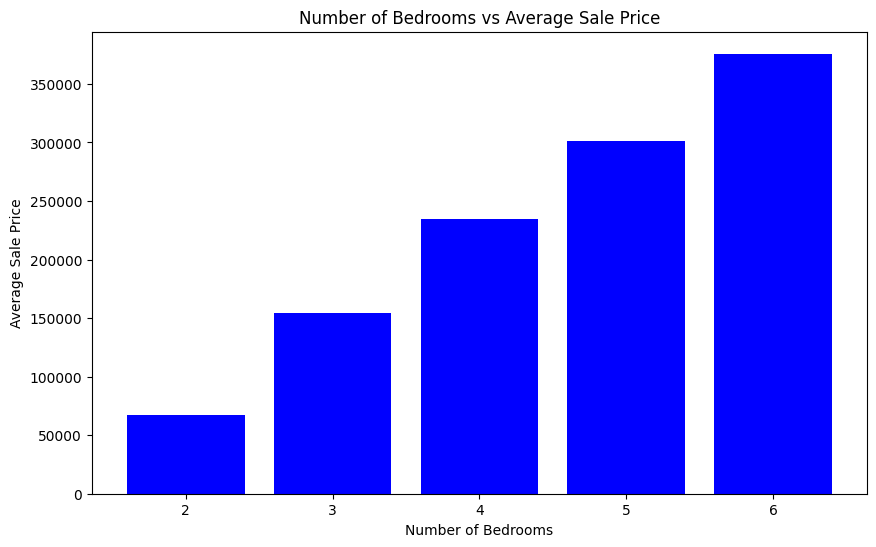

In [126]:
# Use this cell to write your code for Task 3

import pandas as pd



# Load the dataset
house_sales = pd.read_csv("house_sales.csv")
house_sales.info()
house_sales.isnull().sum()


# Step 1: Replace "--" with NaN in the 'city' column
house_sales['city'].replace("--", np.nan, inplace=True)

house_sales['city'].fillna("Unknown", inplace=True)

# Step 2: Remove missing entries in the 'sale_price' column
house_sales = house_sales.dropna(subset=['sale_price'])
house_sales['sale_price'] = house_sales['sale_price'].apply(lambda x: max(0, x))


# Step 3: Replace missing values in the 'sale_date' column with '2023-01-01'
house_sales['sale_date'].fillna('2023-01-01', inplace=True)

# Step 4: Replace missing values in the 'months_listed' column with the mean number of months listed
mean_months_listed = house_sales['months_listed'].mean()
house_sales['months_listed'].fillna(mean_months_listed, inplace=True)
house_sales['months_listed'] = pd.to_numeric(house_sales['months_listed'], errors='coerce').round(1)
# Step 5: Replace missing values in the 'bedrooms' column with the mean number of bedrooms rounded to the nearest integer
mean_bedrooms = round(house_sales['bedrooms'].mean())
print(mean_bedrooms)
house_sales['bedrooms'].fillna(mean_bedrooms, inplace=True)

# Find unique values in the 'bedrooms' column
unique_bedrooms = house_sales['bedrooms'].unique()

# Print the unique values
print("Unique values in the 'bedrooms' column:", unique_bedrooms)
# Step 6: Replace missing values in the 'house_type' column with the most common house type
#   "Terraced", "Semi-detached", "Detached"
house_sales['house_type'].replace({'Det.': 'Detached', 'Semi': 'Semi-detached', 'Terr.': 'Terraced'}, inplace=True)
unique_house_type = house_sales['house_type'].unique()
# Print the unique values
print("Unique values in the 'bedrooms' column:", unique_house_type)

# Step 7: Replace missing values in the 'area' column with the mean area rounded to one decimal place
house_sales['area'] = pd.to_numeric(house_sales['area'].str.replace('sq.m.', '', regex=False), errors='coerce').round(1)
house_sales.info()



# Group by the 'bedrooms' column and calculate the average price and variance
price_by_rooms = house_sales.groupby('bedrooms')['sale_price'].agg(['mean', 'var']).reset_index()

# Rename the columns
price_by_rooms.columns = ['bedrooms', 'avg_price', 'var_price']

# Round the columns to one decimal place
price_by_rooms = price_by_rooms.round(1)

# Display the result
print(price_by_rooms)

import matplotlib.pyplot as plt

# Load the dataset

# Plot the number of bedrooms vs average price
plt.figure(figsize=(10, 6))
plt.bar(price_by_rooms['bedrooms'], price_by_rooms['avg_price'], color='blue')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Sale Price')
plt.title('Number of Bedrooms vs Average Sale Price')
plt.show()


# Task 4

Fit a baseline model to predict the sale price of a house.

 1. Fit your model using the data contained in “train.csv” </br></br>

 2. Use “validation.csv” to predict new values based on your model. You must return a dataframe named `base_result`, that includes `house_id` and `price`. The price column must be your predicted values.

In [127]:
# Use this cell to write your code for Task 4

# Load the dataset
house_sales_train = pd.read_csv("train.csv")
house_sales_train.info()
house_sales_train


import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the training dataset
train_data = pd.read_csv("train.csv")

# Select features (area, city, and house_type) and target variable
X_train = train_data[['area', 'city', 'house_type']]
y_train = train_data['sale_price']

# Preprocessing: One-hot encode the 'city' and 'house_type' columns
preprocessor = ColumnTransformer(
    transformers=[
        ('city', OneHotEncoder(), ['city']),
        ('house_type', OneHotEncoder(), ['house_type'])
    ],
    remainder='passthrough'
)

# Create and fit the Linear Regression model
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_model.fit(X_train, y_train)

# Predictions on the training set
train_predictions = linear_model.predict(X_train)

# Evaluate the model performance on the training set
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)

print(f"Train Mean Squared Error: {train_mse}")
print(f"Train Root Mean Squared Error: {train_rmse}")

# Load the validation dataset
validation_data = pd.read_csv("validation.csv")

# Select features (area, city, and house_type) for validation set
X_validation = validation_data[['area', 'city', 'house_type']]

# Predictions on the validation set
validation_predictions = linear_model.predict(X_validation)

# Create the base_result dataframe
base_result = pd.DataFrame({
    'house_id': validation_data['house_id'],
    'price': validation_predictions
})

# Display the base_result dataframe
print(base_result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       1200 non-null   int64  
 1   city           1200 non-null   object 
 2   sale_price     1200 non-null   int64  
 3   sale_date      1200 non-null   object 
 4   months_listed  1200 non-null   float64
 5   bedrooms       1200 non-null   int64  
 6   house_type     1200 non-null   object 
 7   area           1200 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 75.1+ KB
Train Mean Squared Error: 465401333.2789714
Train Root Mean Squared Error: 21573.16233840026
     house_id          price
0     1331375  119862.707797
1     1630115  304963.568683
2     1645745  383928.786751
3     1336775  121464.511441
4     1888274  272177.404932
..        ...            ...
295   1986255  351990.295169
296   1896276  368192.911984
297   1758223  257441.691697
298   17

# Task 5

Fit a comparison model to predict the sale price of a house.

 1. Fit your model using the data contained in “train.csv” </br></br>

 2. Use “validation.csv” to predict new values based on your model. You must return a dataframe named `compare_result`, that includes `house_id` and `price`. The price column must be your predicted values.

In [128]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the training dataset
train_data = pd.read_csv("train.csv")

# Select features (area, city, and house_type) and target variable
X_train = train_data[['area', 'city', 'house_type']]
y_train = train_data['sale_price']

# Preprocessing: One-hot encode the 'city' and 'house_type' columns
preprocessor = ColumnTransformer(
    transformers=[
        ('city', OneHotEncoder(), ['city']),
        ('house_type', OneHotEncoder(), ['house_type'])
    ],
    remainder='passthrough'
)

# Create and fit the Random Forest regression model
random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

random_forest_model.fit(X_train, y_train)

# Predictions on the training set
train_predictions = random_forest_model.predict(X_train)

# Evaluate the model performance on the training set
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)

print(f"Train Mean Squared Error: {train_mse}")
print(f"Train Root Mean Squared Error: {train_rmse}")

# Load the validation dataset
validation_data = pd.read_csv("validation.csv")

# Select features (area, city, and house_type) for validation set
X_validation = validation_data[['area', 'city', 'house_type']]

# Predictions on the validation set
validation_predictions = random_forest_model.predict(X_validation)

# Create the compare_result dataframe
compare_result = pd.DataFrame({
    'house_id': validation_data['house_id'],
    'price': validation_predictions
})

# Display the compare_result dataframe
print(compare_result)




Train Mean Squared Error: 40796611.82350553
Train Root Mean Squared Error: 6387.222543759183
     house_id          price
0     1331375   80822.740000
1     1630115  303975.269333
2     1645745  399611.550000
3     1336775  107352.580000
4     1888274  269554.336667
..        ...            ...
295   1986255  359549.463333
296   1896276  371812.020000
297   1758223  270581.100000
298   1752010  176962.450000
299   1651404  431097.640000

[300 rows x 2 columns]
